# 建立主题模型

In [1]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
matplotlib.rc("savefig", dpi=400)

In [2]:
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 

In [3]:
matplotlib.rcParams

RcParams({u'agg.path.chunksize': 0,
          u'animation.avconv_args': [],
          u'animation.avconv_path': u'avconv',
          u'animation.bitrate': -1,
          u'animation.codec': u'mpeg4',
          u'animation.convert_args': [],
          u'animation.convert_path': u'convert',
          u'animation.ffmpeg_args': [],
          u'animation.ffmpeg_path': u'ffmpeg',
          u'animation.frame_format': u'png',
          u'animation.html': u'none',
          u'animation.mencoder_args': [],
          u'animation.mencoder_path': u'mencoder',
          u'animation.writer': u'ffmpeg',
          u'axes.axisbelow': False,
          u'axes.edgecolor': u'k',
          u'axes.facecolor': u'w',
          u'axes.formatter.limits': [-7, 7],
          u'axes.formatter.use_locale': False,
          u'axes.formatter.use_mathtext': False,
          u'axes.formatter.useoffset': True,
          u'axes.grid': False,
          u'axes.grid.axis': u'both',
          u'axes.grid.which': u'major',
     

In [5]:
filename = 'C:/Users/Administrator/Desktop/data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()

In [6]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'的', u'人']
for s in adding_stopwords: stopwords[s]=10

In [9]:
def getCorpus(data):
    processed_docs = [tokenize(doc) for doc in data]
    word_count_dict = gensim.corpora.Dictionary(processed_docs)
    print "In the corpus there are", len(word_count_dict), "unique tokens"
    word_count_dict.filter_extremes(no_below=5, no_above=0.2) # word must appear >5 times, and no more than 10% documents
    print "After filtering, in the corpus there are only", len(word_count_dict), "unique tokens"
    bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]
    return bag_of_words_corpus, word_count_dict

def cleancntxt(txt, stopwords):
    tfidf1000= jieba.analyse.extract_tags(txt, topK=1000, withWeight=False)
    seg_generator = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_generator if i not in stopwords]
    seg_list = [i for i in seg_list if i != u' ']
    seg_list = [i for i in seg_list if i in tfidf1000]
    return(seg_list)

def getCnCorpus(data):
    processed_docs = [cleancntxt(doc) for doc in data]
    word_count_dict = gensim.corpora.Dictionary(processed_docs)
    print "In the corpus there are", len(word_count_dict), "unique tokens"
    print "After filtering, in the corpus there are only", len(word_count_dict), "unique tokens"
    bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]
    return bag_of_words_corpus, word_count_dict

def inferTopicNumber(bag_of_words_corpus, num, word_count_dict):
    lda_model = gensim.models.LdaModel(bag_of_words_corpus, num_topics=num, id2word=word_count_dict, passes=10)
    _ = lda_model.print_topics(-1) 
    logperplexity = lda_model.log_perplexity(bag_of_words_corpus)
    return logperplexity

def ppnumplot(topicnum,logperplexity): 
    plt.plot(topicnum,logperplexity,color="red",linewidth=2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.show()  
    
def flushPrint(variable):
    if variable %10^2 == 0:
        sys.stdout.write('\r')
        sys.stdout.write('%s' % variable)
        sys.stdout.flush()
    
    
def top(data):
    for i in data:
        print i
        
def freq(data):
    dtable = defaultdict(int)
    for i in data:
        dtable[i] += 1
    return dtable

def sortdict(data):
    '''data is a dict, sorted by value'''
    return sorted(data.items(), lambda x, y: cmp(x[1], y[1]), reverse=True) 

### 抓取天涯“情趣”话题上点击数最多、最热门的长篇帖子——《情趣店里那些事儿－－长篇纪实连载》，采用主题模型对其主题进行自动化的分析。

In [10]:
import urllib2
from bs4 import BeautifulSoup
import sys

url2016 = 'http://bbs.tianya.cn/m/post-free-1358675-1.shtml'
content = urllib2.urlopen(url2016).read()
soup = BeautifulSoup(content) 


F:\anaconda\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [12]:
gov_report_2016 = [s.text for s in soup('div')]
for i in gov_report_2016[:10]:print i















天涯社区









首页
论坛
聚焦
部落
博客


问答
文学
游戏
农场
打赏

收起













天涯杂谈
情趣店里那些事儿－－-长篇纪实连载


 938588
 6301
 1/315








                        	
                        	拎菜刀
                        	
                        	楼主
2008-07-07 00:14


                        
                        	致版主：    鉴于本长篇具有很强的纪实性，所以文中会涉及到很多真实的商业名词，与广告没啥关系，希望不要删除或隐藏，如觉得哪里不合适，通知修改一下就可以了，谢谢。　　感谢各位看官的支持也需要各位的板砖和鼓励，让我能够把这个很长的长篇坚持下去。　　　　　　1．	黄色5年—情趣店里那些事儿—长篇连载　　　　从03年1月开始,到现在,5年,春水堂,从我一个人,发展到了20个员工。 　　　　 春水堂，是一个情趣店的名字。　　　　 03年1月，这个名字诞生。那时，还在号称中关村村长的老段的公司里打工，那时，激情已经耗尽，知道自己该走了，于是开始谋划这个网站。　　　　 旁边的女同事歪过脸过圆脸说：春水堂？和阿贵的网站重名了。当即晕倒—闷头想了几天的名字，居然会重，那时，只知阿贵，不知春水堂。　　　　 后来，知道台湾一个著名的茶馆，也叫春水堂。　　　　 很多人第一次听到这个名字觉得有点下流，呵呵，一江春水向东流，再加上情趣用品这个行业，难免流氓联想。　　　　 05年接受台湾中天电视台采访，问到这个名字的意思。我说，是取意于南唐爱情古词：风乍起，吹皱一池春水。闲引鸳鸯香径里，手捋红杏蕊......　　　　 被当成流氓习惯了。有几次记忆深刻的被当成流氓的经历:　　　　 03年的女友，是首都师范大学的，某天她告诉我，她的几个闺密，私下说我的行业，叫卖假JB的。当时笑喷—女大学生，果然生猛，我都没想到这么虎虎有声的行业名词。　　　　 05年，一收废品的到我办公室收废纸箱，一北京大爷闲着没事儿跟着一起上楼来，看了满屋子的产品陈列，临出门说了一句—小伙子年轻轻的干点啥不比这强。　　　　

### 先对抓取到的帖子内容进行清洗预处理

In [13]:
def clean_txt(txt):
    for i in [u'、', u'，', u'—', u'！', u'。', u'《', u'》', u'（', u'）']:
        txt = txt.replace(i, ' ')
    return txt


In [14]:
gov_report_2016 = [clean_txt(i) for i in gov_report_2016]

In [15]:
for i in gov_report_2016[:10]:print i















天涯社区









首页
论坛
聚焦
部落
博客


问答
文学
游戏
农场
打赏

收起













天涯杂谈
情趣店里那些事儿－－-长篇纪实连载


 938588
 6301
 1/315








                        	
                        	拎菜刀
                        	
                        	楼主
2008-07-07 00:14


                        
                        	致版主：    鉴于本长篇具有很强的纪实性 所以文中会涉及到很多真实的商业名词 与广告没啥关系 希望不要删除或隐藏 如觉得哪里不合适 通知修改一下就可以了 谢谢 　　感谢各位看官的支持也需要各位的板砖和鼓励 让我能够把这个很长的长篇坚持下去 　　　　　　1．	黄色5年 情趣店里那些事儿 长篇连载　　　　从03年1月开始,到现在,5年,春水堂,从我一个人,发展到了20个员工  　　　　 春水堂 是一个情趣店的名字 　　　　 03年1月 这个名字诞生 那时 还在号称中关村村长的老段的公司里打工 那时 激情已经耗尽 知道自己该走了 于是开始谋划这个网站 　　　　 旁边的女同事歪过脸过圆脸说：春水堂？和阿贵的网站重名了 当即晕倒 闷头想了几天的名字 居然会重 那时 只知阿贵 不知春水堂 　　　　 后来 知道台湾一个著名的茶馆 也叫春水堂 　　　　 很多人第一次听到这个名字觉得有点下流 呵呵 一江春水向东流 再加上情趣用品这个行业 难免流氓联想 　　　　 05年接受台湾中天电视台采访 问到这个名字的意思 我说 是取意于南唐爱情古词：风乍起 吹皱一池春水 闲引鸳鸯香径里 手捋红杏蕊......　　　　 被当成流氓习惯了 有几次记忆深刻的被当成流氓的经历:　　　　 03年的女友 是首都师范大学的 某天她告诉我 她的几个闺密 私下说我的行业 叫卖假JB的 当时笑喷 女大学生 果然生猛 我都没想到这么虎虎有声的行业名词 　　　　 05年 一收废品的到我办公室收废纸箱 一北京大爷闲着没事儿跟着一起上楼来 看了满屋子的产品陈列 临出门说了一句 小伙子年轻轻的干点啥不比这强 　　　　

In [16]:
len(gov_report_2016[5:-1])

129

In [18]:
jieba.add_word(u'情趣', freq=None, tag=None)
print ' '.join(cleancntxt(u'情趣店里那些事儿', stopwords))

情趣 店里 那些 事儿


In [19]:
processed_docs = [cleancntxt(doc, stopwords) for doc in gov_report_2016[5:-1]]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
print "In the corpus there are", len(word_count_dict), "unique tokens"
bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]

In the corpus there are 1242 unique tokens


In [20]:
tfidf = models.TfidfModel(bag_of_words_corpus )
corpus_tfidf = tfidf[bag_of_words_corpus ]
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=20, id2word=word_count_dict, passes=10)

In [21]:
perplexity_list = [inferTopicNumber(bag_of_words_corpus, num, word_count_dict) for num in [5, 15, 20, 25, 30, 35, 40 ]]

### 下面是画出的折线图，在拐点附近再调整参数，寻找最优的主题数。实验证明，只要Topic选取数量在其附近，主题抽取一般比较理想。

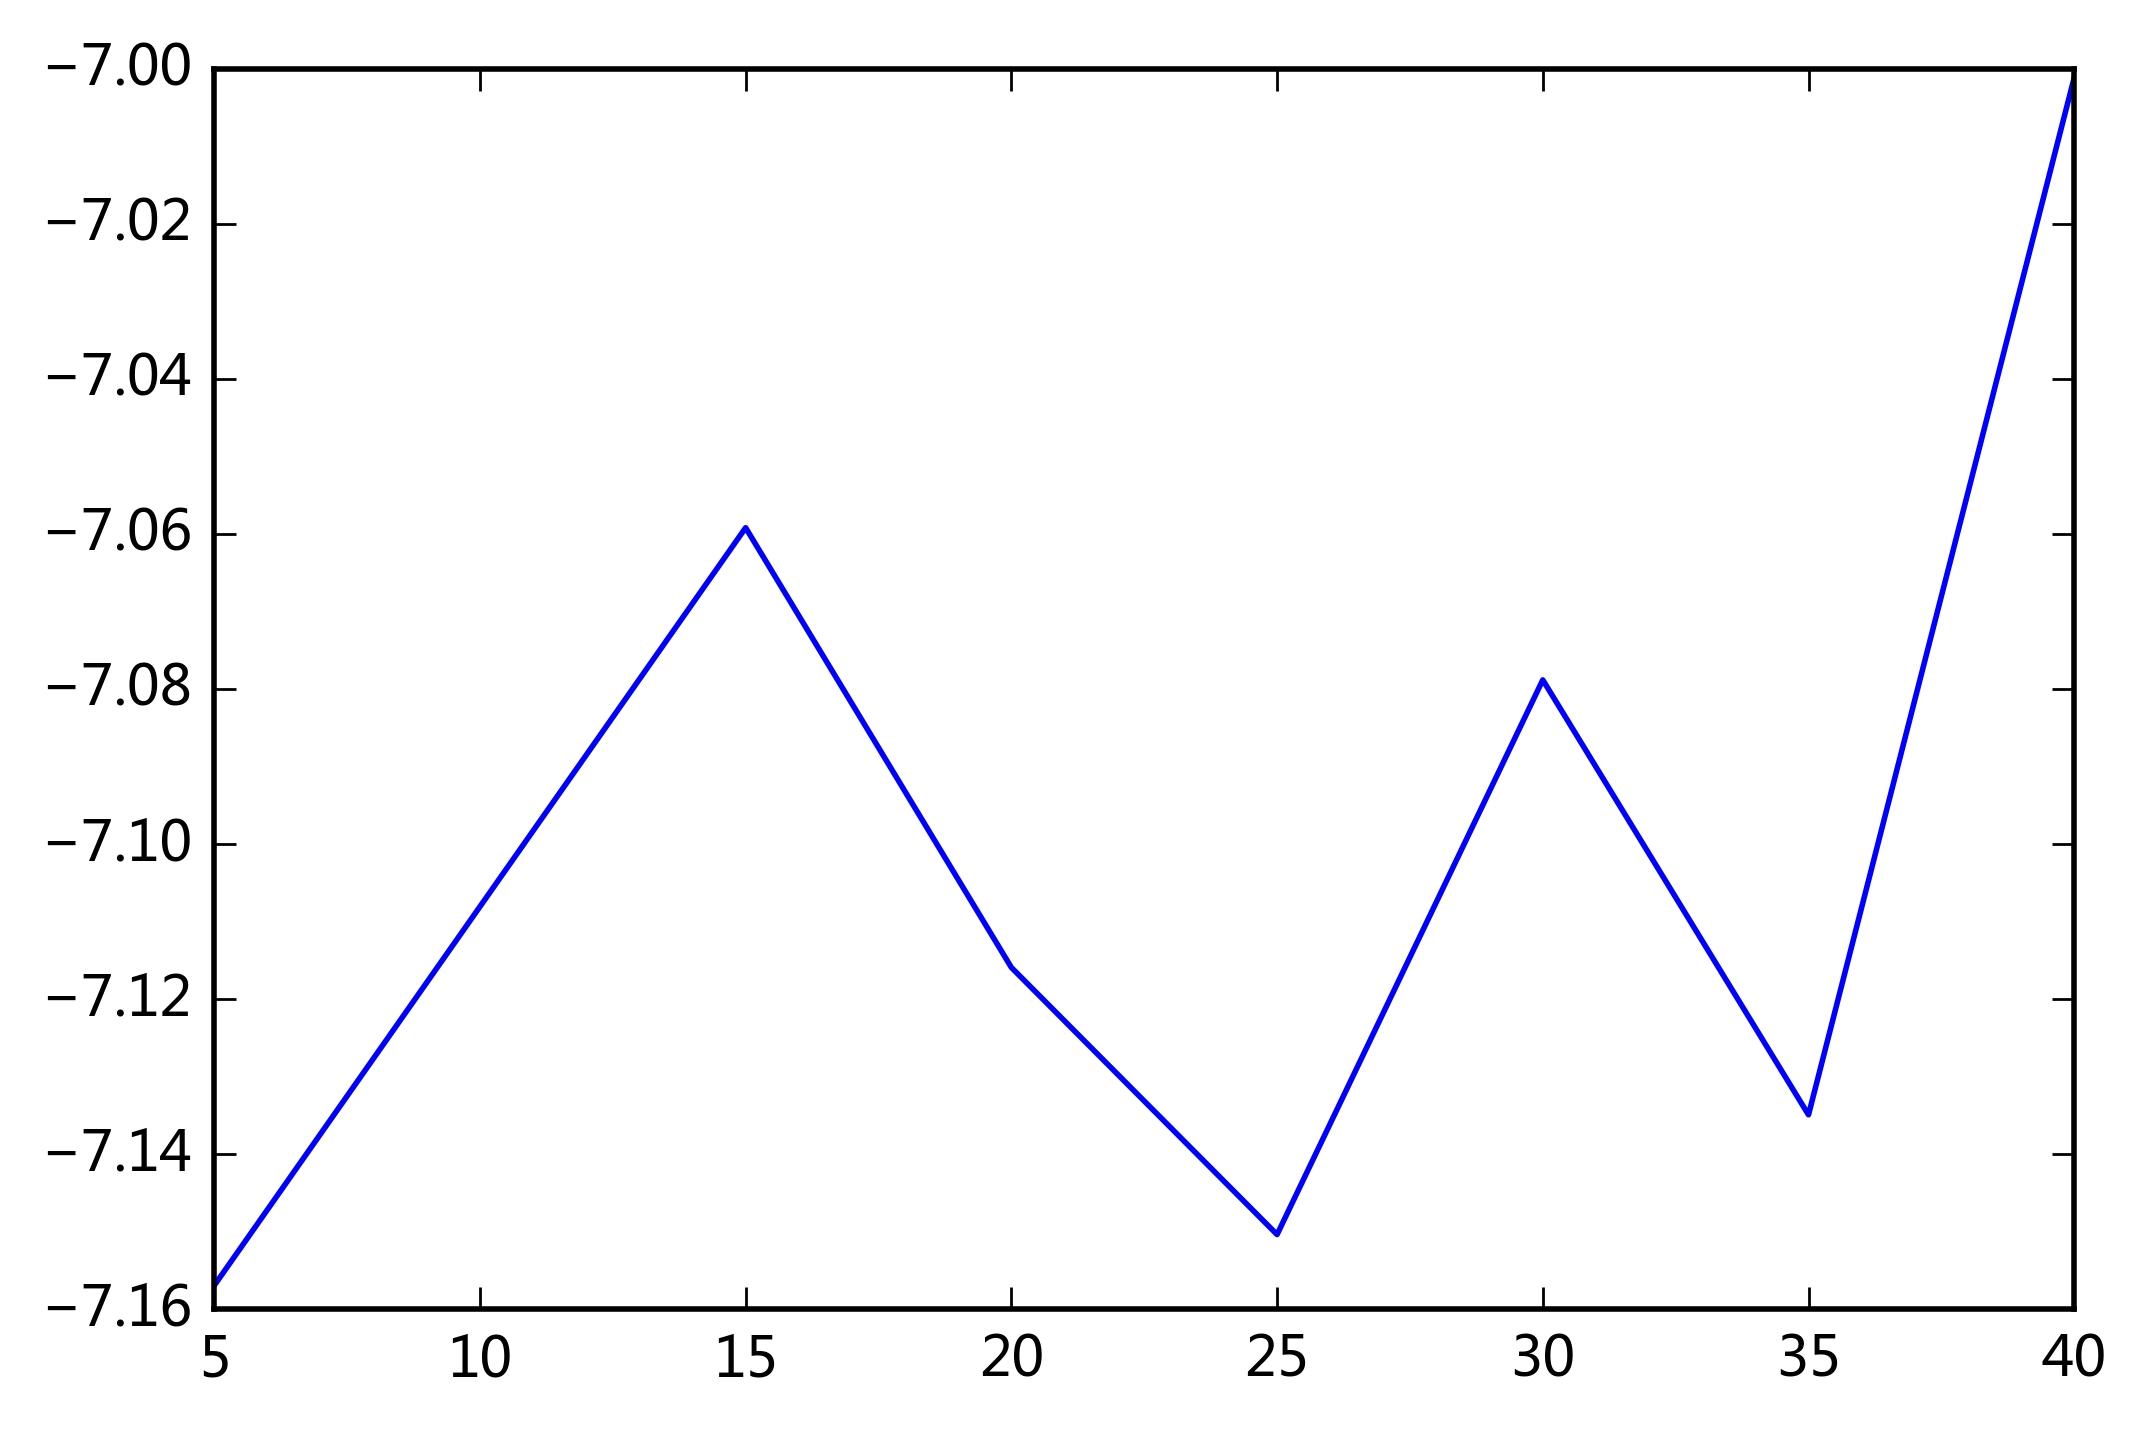

In [22]:
plt.plot([5, 15, 20, 25, 30, 35, 40], perplexity_list)

In [ ]:
topictermlist = lda_model.print_topics(-1)
top_words = [[j.split('*')[1] for j in i.split(' + ')] for i in topictermlist] 
for i in top_words: print " ".join(i) + '\n'

In [ ]:
top_words_shares = [[j.split('*')[0] for j in i.split(' + ')] for i in topictermlist] 
top_words_shares = [map(float, i) for i in top_words_shares]
def weightvalue(x):
    return (x - np.min(top_words_shares))*40/(np.max(top_words_shares) -np.min(top_words_shares)) + 10
 
top_words_shares = [map(weightvalue, i) for i in top_words_shares]  

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (10.0, 4.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title(u'主题 #{}'.format(t+1), size = 5)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word, fontsize= np.log(share*10))
        n += 1

In [ ]:
plotTopics(0, 10)

In [ ]:
plotTopics(10, 20)

### 探究很久不知什么原因，主题模型图像呈现失败。但采用主题模型的算法可以将此篇帖子的内容分为不同主题进行归类。